In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

## One way Annova Test

In [ ]:
data = sns.load_dataset("iris")

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

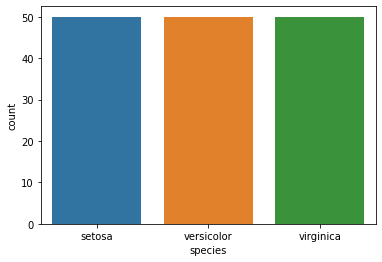

In [ ]:
sns.countplot(x='species',data=data)

Here we see that we have three categories of flowers, Now we want to test whether petal width is same for all the three categories or they are different. 

For this we will use annova test

H0:- Petal width is same for all three different categories of flowers

H1:- Petal width is different for all three different categories of flowers

In [ ]:
d_setosa = data[ data['species']=='setosa' ]['petal_width'].to_numpy()

In [ ]:
d_setosa

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2])

In [ ]:
d_versicolor = data[ data['species']=='versicolor' ]['petal_width'].to_numpy()

In [ ]:
d_versicolor

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

In [ ]:
d_virginica = data[ data['species']=='virginica' ]['petal_width'].to_numpy()

In [ ]:
d_virginica

array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
       2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
       1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
       2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [ ]:
F, p_value = stats.f_oneway(d_setosa,d_versicolor,d_virginica)

In [ ]:
p_value

4.169445839443116e-85

In [ ]:
alpha = 0.05

In [ ]:
print(f' Test statistics : {F} \n Alpha : {alpha} \n P-value : {p_value}')
if p_value > alpha:
  print(' ')
  print('Accept Null Hypothesis')
else:
  print(' ')
  print('Reject Null Hypothesis')

 Test statistics : 960.007146801809 
 Alpha : 0.05 
 P-value : 4.169445839443116e-85
 
Reject Null Hypothesis


Here we see that P_value is less than 0.05 (our significance level) so we reject our Null hypothesis and accept our Alternate hypothesis

This Proves that petal_width of flowers of different categories are different

## Two sample t-Test

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
dataset = pd.read_csv('/content/day.csv',index_col = 'instant')
dataset

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


Here we see that all the values are integer or float except date (dteday) which is an object

In [ ]:
dataset.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We don't have any null values in this dataset

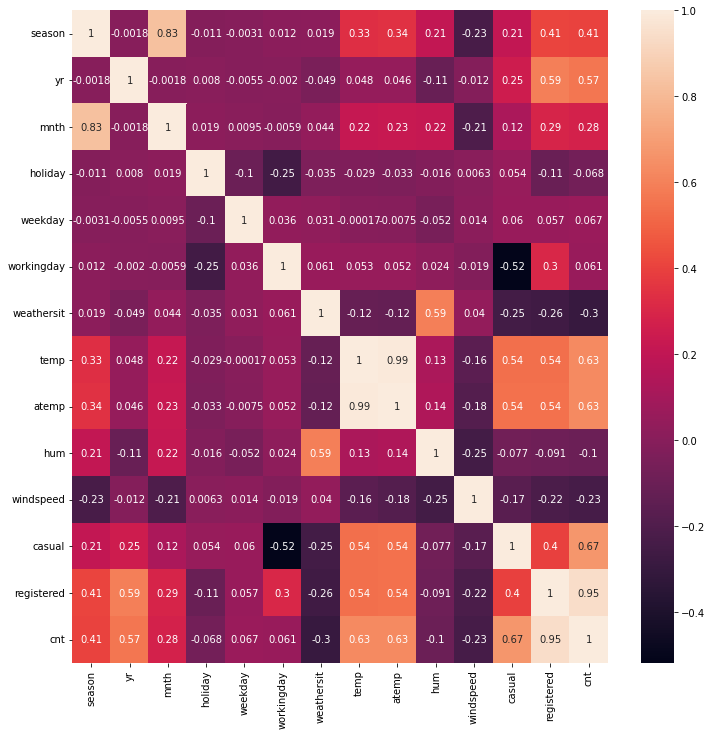

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True)

From above figure we can see that there is a high correlation between temp and atemp variable. 

Also season and month also have high correlation of about 83%. This suggest we can drop features like Month and atemp

Also the date feature which is a object in our dataset needs to be parsed and convert into a integer type dataset..

Our aim as of now is not do predictive analysis using Machine Leraning algorithm but rather we will bw doing Hypothesis testing on our dataset.

So we will drop this feature also

In [ ]:
df = dataset.drop(columns = ['mnth','atemp','dteday'],axis=1)

In [ ]:
df

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,
1,1,0,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
2,1,0,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
3,1,0,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
4,1,0,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
5,1,0,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
727,1,1,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
728,1,1,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
729,1,1,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341


Now we want to find ot that--- Is there any relationship between count of bicycle rented and workingday variable

Our Null hypothesis is as follows 

H0:- Number of bicycles rented are same irrespective of working day

While our Alternative Hypothesis suggests that 

H1:- Number of bicycle rented are different and depends whether it's a working day or not

In [ ]:
df['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

We need equal sample for both the classes (0 and ) to perform our two sample t - Test

In [ ]:
sample1 = df[df['workingday']==1].sample(n=231)['cnt']
sample2 = df[df['workingday']==0]['cnt']

In [ ]:
sample1 = sample1.to_numpy()
sample1

array([3598, 2115, 3982, 4401, 4708, 4109, 3613, 6073, 4189, 4332, 4576,
       2209, 6772, 8362, 3777, 2660, 5102, 4539, 7001, 1927,  623, 2134,
       1872, 2368, 3141, 3292, 6211, 4795, 5585, 3272, 4040, 7697, 3740,
       5170, 4339, 6784, 4608, 6778, 7415, 4458, 6133, 3669, 7112, 1650,
       5558, 2594, 5204, 4835, 1917, 1471, 8156, 3214, 5382, 5225, 4097,
       7393, 3053, 5634, 5532, 5501, 1321, 5743, 4972, 6153, 5992,  705,
       5936, 5315, 4590, 2133, 4375, 5260, 7870, 3910, 4401, 5409, 3855,
       1406, 4068, 7006, 6904, 5698, 4864, 4128, 7442, 3239, 4839, 4602,
       5538, 3570, 4098, 7286, 2424, 3727,  683, 2703, 5740, 3831, 1461,
       4665, 2802, 4378, 7328, 6192, 4679, 5020, 7013, 1263, 1349, 2192,
       4304,  431, 5298, 3624,  920, 7335, 5698, 6864, 5713, 5087, 2475,
       7338, 5099, 1685, 5557, 3623, 4390, 4359, 7466, 4639, 1536, 4274,
       1526, 2744, 5895, 6966, 7580, 4187, 3310, 1510, 5115, 4891, 3974,
       3644, 2121, 7444, 4677, 3487, 5572, 5515, 49

In [ ]:
sample2 = sample2.to_numpy()
sample2

array([ 985,  801,  959,  822, 1248, 1204, 1000,  981,  986, 1098, 1096,
       1005, 1623, 1472, 1589, 1635, 1812, 1107, 1969, 2402, 2077,  605,
       2132, 2417, 3117, 2471, 2496, 1693, 2252, 3249, 2455, 2895, 3126,
        795, 3744, 4036, 4191, 5312, 3351, 4714, 4333, 3409, 4553, 5805,
       4660, 4758, 4788, 4098, 5342, 4906, 4966, 4460, 5119, 4744, 5202,
       5305, 5119, 4649, 6043, 5336, 4881, 5923, 5302, 3285, 3606, 4475,
       4302, 4294, 3785, 4150, 3820, 5191, 3873, 1115, 4334, 4484, 4940,
       3351, 5345, 5046, 4511, 4274, 5423, 5010, 2429, 2918, 5409, 5511,
       5117, 5217, 5041, 4308, 4381,  627, 3331, 3926, 3649, 3368, 4067,
       3717, 3663, 3520, 1495, 3068, 3071, 3614, 3485, 3190, 2743, 2739,
       2431, 1011,  754, 1317, 2485, 2294, 1951, 4521, 3425, 2493, 2311,
       2298, 1301, 1977, 4023, 3243, 2832, 2947, 2169, 1529, 4318, 2689,
       3129, 2732, 3389, 4066, 3423, 4118, 4911, 7836, 5892, 3372, 4996,
       6235, 6041, 6857, 5169, 7460, 7132, 6370, 66

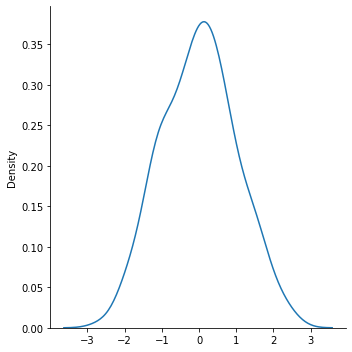

In [ ]:
from sklearn.preprocessing import scale
sns.displot(x = scale(sample2-sample1),kind = 'kde')

This closely resembles normal distribution so we can use two sample t-test

Shapiro-Wilk test for confirmation of Normal distribution

In [ ]:
alpha = 0.05
statistic,p_value = stats.shapiro(sample2-sample1)
if p_value > alpha:
  print(f'Normally distributed p-value : {p_value}')
else:
  print(f' Not Normally distributed p-value : {p_value}')

Normally distributed p-value : 0.6368043422698975


To Check for variance we will proceed with Levene's test

Levene's test to check whether the variances of the two group are same.

H0 : Variances are same.

H1 : Variances are not same.

Alpha = 0.05%

if p-value > alpha (Cannot reject H0)

if p-value < alpha (Accept null hypothesis)

In [ ]:
alpha = 0.05

Stats,Pvalue = stats.levene(sample1,sample2)

print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
  print(' Variances are same accept null hypothesis ')
else:
  print(' Variances are not same reject not null hypothesis ')

 Test statistics : 6.358842196980686 
 Alpha : 0.05 
 P-value : 0.012016457468435224
 Variances are not same reject not null hypothesis 


##  Another Example for One-way Annova test based on this dataset

Now that we have the data ready for t - Test we again state ou null and alternate hypothesis and perform our test

**H0:- Numberof bicycles rented are same irrespective of working day**
 

**H1:- Number of bicycle rented are different and depends whether it's a working day or not**

In [ ]:
alpha = 0.05

Stats,Pvalue = stats.ttest_ind(sample1,sample2)

print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
  print('Accept Null Hypothesis')
else:
  print('Reject Null Hypothesis')

 Test statistics : 1.181083217263005 
 Alpha : 0.05 
 P-value : 0.23817995512754409
Accept Null Hypothesis




> ***As we can see that the p-value is greater than alpha. So we can't reject our null hypothesis.
working day has no effect on number of bikes rented.***



Now ANOTHER QUESTION that may arise in our mind is that whether the number of bike rentals on a day depends on the weather or not.

In [ ]:
df['weathersit'].unique()

array([2, 1, 3])

In [ ]:
df['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

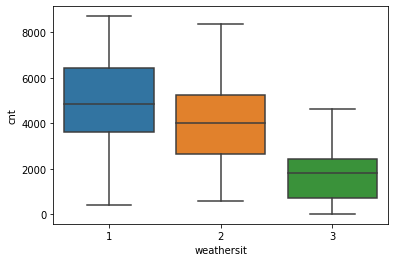

In [ ]:
sns.boxplot(x=df['weathersit'],y=df['cnt'],data = df)

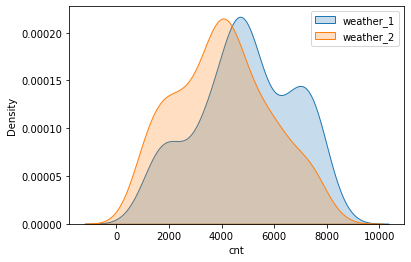

In [ ]:
sns.kdeplot(x = df[df['weathersit']==1]['cnt'],label = 'weather_1',shade=True)
sns.kdeplot(x = df[df['weathersit']==2]['cnt'],label = 'weather_2',shade=True)
plt.legend()

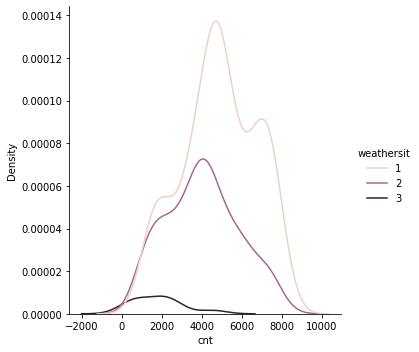

In [ ]:
sns.displot(x = df['cnt'],kind = 'kde',hue = 'weathersit', data = df)

As a first step we state our null and alternate hypothesis

H0:- There is no relationship between number of bike rentals and weather for a paticular day


H1 :- Number of Bike rentals on a day is different for different weather

**Since number of bike rentals is a continuous variable and we have more than two categories for weather we will use one way annova test**

In [ ]:
d_weather1 = df[ df['weathersit']==1 ]['cnt'].sample(n=25).to_numpy()
d_weather1

array([2298, 6883, 2703, 5041, 5298, 5729, 8294, 4840, 4339, 1321, 7347,
       4486, 2133, 7109, 5267, 6857, 6457, 6565, 4456, 3239, 4322, 5102,
       3272, 3785, 7105])

In [ ]:
d_weather2 = df[ df['weathersit']==2 ]['cnt'].sample(n=25).to_numpy()
d_weather2

array([3053, 1162, 6230, 5010, 7175, 1944, 4036, 3740, 2121, 4367, 3974,
       1107, 6664, 4150, 4378, 4451, 7572, 2162, 4127, 1248, 1446, 7328,
       1360, 1526, 6140])

In [ ]:
d_weather3 = df[ df['weathersit']==3 ]['cnt'].to_numpy()
d_weather3

array([ 506,  623, 1685,  795, 2710, 1996, 1842, 2416, 2424,  627, 1817,
       2765, 1607, 2594,  705, 2169, 1027, 4459, 4639,   22,  441])

In [ ]:
F, p_value = stats.f_oneway(d_weather1,d_weather2,d_weather3)

In [ ]:
p_value

5.140216133849556e-07

In [ ]:
if p_value>0.05:
  print("Accept the Null hypothesis")
else:
  print("\nWe reject the null hypothesis and conclude that weather has effects on number of bike rentals on a day")


We reject the null hypothesis and conclude that weather has effects on number of bike rentals on a day
